In [1]:
from client import start_client
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from matplotlib.pyplot import figure
from main_func import main,real_partial
from plotting import plot, plot_workers, plot_speedup
from jupyterthemes import jtplot

client,w=start_client(17)
client

<Client: 'tcp://127.0.0.1:35346' processes=17 threads=17, memory=33.69 GB>


Client Scheduler: tcp://127.0.0.1:35346 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 17 Cores: 17 Memory: 33.69 GB


In [18]:
# df= pd.DataFrame(columns=['n_workers','rounds','subrounds', 'start_time', 'wait_time', 
#                           'process_time_sub','process_time_round'])
# df.to_csv('data.csv',index=False)

df=pd.read_csv('data.csv')
# df = df.drop(df.index[0])
# df = df.sort_values(by=['n_workers'])
# df = df.drop(df.index[3])
# df.to_csv('data.csv',index=False)
# fig, ax = plt.subplots(figsize=(8,6))
# df = df.groupby(['n_workers']).mean().plot(kind='line', ax=ax)
# ax.set_ylim(-1,2)
# ax.set_ylabel('Time (sec)')
# ax.set_xlabel('Workers')
# ax.set_title("Time needed for different stages of coordinator\n regarding the number of workers")
# plt.savefig('B_'+"Plots/Times_try2")
# df = df.groupby(['n_workers']).mean()
# df= df.reset_index()
df

,n_workers,rounds,subrounds,start_time,wait_time,process_time_sub,process_time_round
0,4.0,5.400000,6.733333,0.015079,1.521106,0.127838,0.038835
1,8.0,9.200000,11.933333,0.024972,1.674871,0.358296,0.250204
2,12.0,17.400000,23.000000,0.038361,2.806795,0.758316,0.537291
3,16.0,21.333333,30.533333,0.048864,3.325995,1.248174,0.993534
4,20.0,15.600000,22.200000,0.045263,2.583441,1.000222,0.940558
5,24.0,15.866667,25.333333,0.048787,2.550134,1.324591,1.224090
6,28.0,12.133333,19.266667,0.053184,2.035733,0.984522,0.788595
7,32.0,11.000000,16.400000,0.053321,1.842662,0.823259,0.736483


In [17]:
df.to_csv('data.csv',index=False)

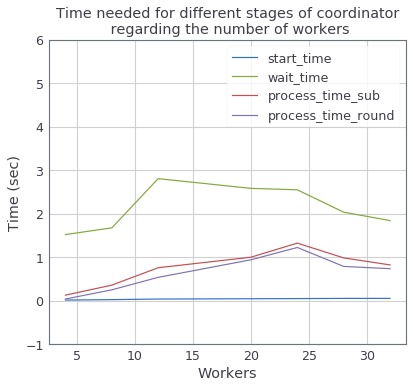

In [4]:
jtplot.style(theme='grade3')
ax = plt.gca()

df.plot(kind='line',x='n_workers',y='start_time',ax=ax)
df.plot(kind='line',x='n_workers',y='wait_time', ax=ax)
df.plot(kind='line',x='n_workers',y='process_time_sub', ax=ax)
df.plot(kind='line',x='n_workers',y='process_time_round', ax=ax)
ax.set_ylim(-1,6)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Workers')
ax.set_title("Time needed for different stages of coordinator\n regarding the number of workers")

plt.show()


### Main function
- make_classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification
- choose e, and chunk size
- run multiple times to produce plots


### Initialize
***

In [5]:
jtplot.style(theme='grade3') #light plot theme

batches=30000 #number of minibatches
batch_size=1 #size of each minibatch
e=0.8 #tolerance for φ(χ)

#compute samples size
training_s=batches*batch_size
n_samples=int(3*training_s/2) # 1/3 of the samples will be used for testing

#parameters for make classification
dataset_params={
    "n_samples":n_samples,
    "n_features":1000,
    "n_informative":10,
    "n_redundant":0,
    "n_repeated":0,
    "n_classes":2,
    "n_clusters_per_class":1,
    "flip_y":0.2,
    "weights":[0.7,0.3],
    "random_state":17
}
threshold=0.03

chunks=100
e_array=[0.01,0.1,0.3,0.8]
e=0.3
sizes=[30000,50000,100000,150000,200000,300000]
minibatches=[10,50,100]
new="no" #choose if you want to recreate the dataset

### Dataset with no noise flip_y=0
***
#### Balanced
- weights=[0.5,0,5]

In [6]:
# 3 different e
new="no"
dataset_params["weights"]=[0.5,0.5]
Acc_threshold=[]
Rounds_threshold=[]
Time_threshold=[]
total_time_list=[]
total_acc_list=[]
labels=[[]]

for i in range(15):
    Acc,time_l,total_rounds,total_time,total_acc=main(client,w,new,dataset_params,e,chunks,minibatches[0])
    new="no"
    total_time_list.append(total_time)
    total_acc_list.append(total_acc)
    Acc_threshold.append(Acc)
    Rounds_threshold.append(total_rounds)
    Time_threshold.append(time_l)
    time.sleep(2)

-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  6
In progress...
[1, 16, 0.19657468795776367]
Accuracy: 79.386667
[3, 16, 0.5874032974243164]
Accuracy: 78.540000
[4, 16, 0.752612829208374]
Accuracy: 81.146667
[6, 16, 1.1340456008911133]
Accuracy: 81.260000
[7, 16, 1.3088178634643555]
Accuracy: 81.720000
[9, 16, 1.6963517665863037]
Accuracy: 81.300000
[10, 16, 1.8759758472442627]
Accuracy: 81.440000
[12, 16, 2.2687180042266846]
Accuracy: 81.886667
[13, 16, 2.4619839191436768]
Accuracy: 82.353333
[15, 16, 2.7500367164611816]
Accuracy: 82.893333
[16, 16, 2.952091932296753]
Accuracy: 82.406667
[18, 16, 3.245509386062622]
Accuracy: 82.360000
[20, 15, 3.541180372238159]
Accuracy: 82.833333
[21, 14, 3.8158178329467773]
Accuracy: 82.393333
[22, 13, 3.9851982593536377]
Accuracy: 81.800000
[23, 13, 4.184351682662964]
Accuracy: 81.460000
[25, 11, 4.565290927886963]
Accuracy: 81.580000
[26,

[13, 14, 2.449683666229248]
Accuracy: 82.080000
[15, 14, 2.725210666656494]
Accuracy: 82.413333
[16, 14, 2.9147958755493164]
Accuracy: 82.106667
[18, 12, 3.30764102935791]
Accuracy: 80.953333
[19, 10, 3.476351261138916]
Accuracy: 80.520000
[20, 10, 3.7331230640411377]
Accuracy: 67.920000
[21, 0, 4.115832805633545]
Accuracy: 83.006667

**
 Pass 0 completed
**

Total time [4.115832805633545]
-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  6
In progress...
[1, 16, 0.17304539680480957]
Accuracy: 80.533333
[3, 16, 0.5503337383270264]
Accuracy: 79.520000
[5, 16, 0.9110851287841797]
Accuracy: 79.960000
[7, 16, 1.2835402488708496]
Accuracy: 80.380000
[8, 16, 1.4628589153289795]
Accuracy: 81.413333
[9, 16, 1.670647144317627]
Accuracy: 82.313333
[10, 16, 1.848656177520752]
Accuracy: 82.253333
[11, 16, 2.0485363006591797]
Accuracy: 82.606667
[12, 16, 2.2353193759918213]
Accuracy: 82.620000

-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  6
In progress...
[1, 16, 0.16968393325805664]
Accuracy: 78.906667
[3, 16, 0.5495157241821289]
Accuracy: 79.413333
[5, 16, 0.9169058799743652]
Accuracy: 78.926667
[6, 16, 1.085541009902954]
Accuracy: 80.773333
[7, 16, 1.2897214889526367]
Accuracy: 80.113333
[8, 16, 1.4736592769622803]
Accuracy: 81.020000
[9, 16, 1.6608169078826904]
Accuracy: 81.800000
[11, 16, 2.048643112182617]
Accuracy: 81.740000
[12, 16, 2.2459964752197266]
Accuracy: 82.306667
[13, 16, 2.42614483833313]
Accuracy: 82.286667
[14, 15, 2.6263070106506348]
Accuracy: 82.593333
[16, 15, 3.0199639797210693]
Accuracy: 82.246667
[17, 14, 3.207343578338623]
Accuracy: 82.366667
[19, 13, 3.5869786739349365]
Accuracy: 81.746667
[20, 12, 3.7679731845855713]
Accuracy: 81.533333
[22, 11, 4.04603385925293]
Accuracy: 80.046667
[24, 11, 4.426395654678345]
Accuracy: 80.860000
[25, 10

In [7]:
total_time_mean=[sum(suby) / len(suby) for suby in zip(*total_time_list)] 
total_acc_mean=[sum(suby) / len(suby) for suby in zip(*total_acc_list)] 
name1="np_arrays/total/total_time"+str(len(w)-1)
name2="np_arrays/total/total_acc"+str(len(w)-1)
name3="np_arrays/total/total_time_mean"+str(len(w)-1)
name4="np_arrays/total/total_acc_mean"+str(len(w)-1)
np.save(name1,total_time_list)
np.save(name2,total_acc_list)
np.save(name3,total_time_mean)
np.save(name4,total_acc_mean)
total_time_list,total_time_mean, total_acc_list, total_acc_mean

([[6.568024158477783],
  [5.355369567871094],
  [4.794458627700806],
  [6.854326963424683],
  [4.404970169067383],
  [6.9212486743927],
  [4.115832805633545],
  [4.879686117172241],
  [5.814989328384399],
  [4.72637414932251],
  [5.653906583786011],
  [8.389243125915527],
  [5.786632776260376],
  [7.025968074798584],
  [2.7675607204437256]],
 [5.603906122843425],
 [[0.7753333333333333],
  [0.7769333333333334],
  [0.7835333333333333],
  [0.8106666666666666],
  [0.7888666666666667],
  [0.7555333333333333],
  [0.8300666666666666],
  [0.7530666666666667],
  [0.7872],
  [0.8066666666666666],
  [0.7839333333333334],
  [0.7847333333333333],
  [0.8059333333333333],
  [0.7304666666666667],
  [0.8282666666666667]],
 [0.7867466666666666])

In [8]:
# centr=client.submit(real_partial,minibatches[1],workers=w[0])
# time_centr,Acc_real1,f_acc=centr.result()
# t_list,time_centr,Acc_real1,f_acc=real_partial(10)
# len_real1=np.array([i for i in range(len(Acc_real1))])
# labels='centralized'
# np.save('np_arrays/time_centr',time_centr)
# np.save('np_arrays/Acc_real1',Acc_real1)
# np.save('np_arrays/f_acc',f_acc)

In [9]:
# time_centr=np.load('np_arrays/time_centr.npy')
# f_acc=np.load('np_arrays/f_acc.npy')
# plot_workers([4,8,12,16,20,24,28,32],time_centr,f_acc)
# plot_speedup([4,8,12,16,20,24,28,32],time_centr,f_acc)

In [10]:
# name="Plots/test2.png"
# plot(t_list,Acc_real1,Acc_threshold,Rounds_threshold,Time_threshold,e_array,'centralized',name,'threshold')

In [11]:
from IPython.display import Audio, display
display(Audio(url='http://peal.io/download/5e289.wav', autoplay=True))
# http://peal.io/download/mr5xx.wav

In [12]:
# Acc_minibatch=[]
# Rounds_minibatch=[]
# Time_minibatch=[]
# e=0.2
# for i in minibatches :
#     minibatch=i
#     Acc,n_rounds,time_stamps=main(client,w,new,dataset_params,e,chunks,minibatch)
#     new="no"
#     Acc_minibatch.append(Acc)
#     Rounds_minibatch.append(n_rounds)
#     Time_minibatch.append(time_stamps)
#     time.sleep(5)

In [13]:
# name="Plots/Minibatch_4x_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_minib_"+str(minibatches)+".png"
# plot(l1,l2,Acc_minibatch,Rounds_minibatch,Time_minibatch,minibatches,labels,name,'minibatches')

### Save results

In [14]:
# f = open("result.txt", "a")
# f.writelines(["\n\n==========================================================================="])
# f.writelines(["\nNEW EXPERIMENT:\nparams:",str(dataset_params),"\nminibaches_size:"
#               ,str(minibatches),"\ndifferent e's:",str(e_array),"\nn_workers: ",str(len(w))])
# f.writelines(["\n___________________________________________________________________________"])
# f.writelines(["\nRESULTS:\nAcc_threshold",str(Acc_threshold),"\nRounds_threshold",str(Rounds_threshold),
#              "\nTime_threshold",str(Time_threshold),"\nlen_real1",str(len_real1),"\nAcc_real1",str(Acc_real1)])
# f.close()

### Shutdown client

In [15]:
client.close()
client.shutdown()